# Preliminary Analysis of Vehicle Collision Data with V2V Communication

This AI assisted notebook gives us preliminary results for our analysis on collision data across three categories:
1. Human-Human vehicle collisions
2. AI-Human vehicle collisions
3. AI-AI vehicle collisions

We'll examine how V2V communication technology affects collision rates using mock data that we are assuming will be obtained in the future through our simulation.

### Prompt Used

Make a jupyter notebook file that looks at car data collisions for AI vehicles that use V2V communication. Please include collision data (human-human, ai-human, ai-ai) and number of ai and human elements in the charts. We want to use this for analysis

### Model Used

Claude 3.7 Sonnet

### Uses

The generated response provided us a great boiler plate for analysis. We modified its sample data generation as well as which charts we wanted to keep. The modified version is what is kept below.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

## Generate Sample Data

Since we don't have actual data, we'll generate a realistic dataset that reflects expected patterns in V2V collision data.

In [52]:
def generate_collision_data(num_runs=5, seed=42):
    np.random.seed(seed)
    
    runs = list(range(1, 1 + num_runs))
    
    data = []
    
    human_vehicles_initial = 500000  # 10 million human vehicles
    ai_vehicles_initial = 500000      # 500,000 AI vehicles initially
    human_growth_rate = 0.02          
    ai_growth_rate = 0.30
    
    human_human_rate = 15.0       # Higher rate for human-human collisions
    ai_human_rate = 8.0           # Lower rate for AI-human collisions
    ai_ai_rate = 1.0              # Very low rate for AI-AI collisions
    
    for i, run in enumerate(runs):
        # Calculate vehicle populations with growth
        human_vehicles = int(human_vehicles_initial * (1 + human_growth_rate) ** i)
        ai_vehicles = int(ai_vehicles_initial * (1 + ai_growth_rate) ** i)
        
        human_human_collisions = int((human_human_rate * (human_vehicles / 10000)) * 
                                  np.random.normal(1.0, 0.1))  # Add some noise
        
        ai_human_collisions = int((ai_human_rate * (ai_vehicles / 10000) * (human_vehicles / 10000) * 0.001) * 
                                np.random.normal(1.0, 0.1))
        
        ai_ai_collisions = int(((ai_vehicles / 10000) ** 2 * 0.0001) * 
                           (ai_ai_rate) * 
                           np.random.normal(1.0, 0.15))
        
        total_collisions = human_human_collisions + ai_human_collisions + ai_ai_collisions
        
        data.append({
            'Run': run,
            'Human_Vehicles': human_vehicles,
            'AI_Vehicles': ai_vehicles,
            'Human_Human_Collisions': human_human_collisions,
            'AI_Human_Collisions': ai_human_collisions,
            'AI_AI_Collisions': ai_ai_collisions,
            'Total_Collisions': total_collisions,
        })
    
    return pd.DataFrame(data)

collision_df = generate_collision_data(5)
collision_df

,Run,Human_Vehicles,AI_Vehicles,Human_Human_Collisions,AI_Human_Collisions,AI_AI_Collisions,Total_Collisions
0,1,500000,500000,787,19,0,806
1,2,510000,650000,881,25,0,906
2,3,520200,845000,903,37,0,940
3,4,530604,1098500,839,44,1,884
4,5,541216,1428050,831,50,1,882


## Collision Analysis

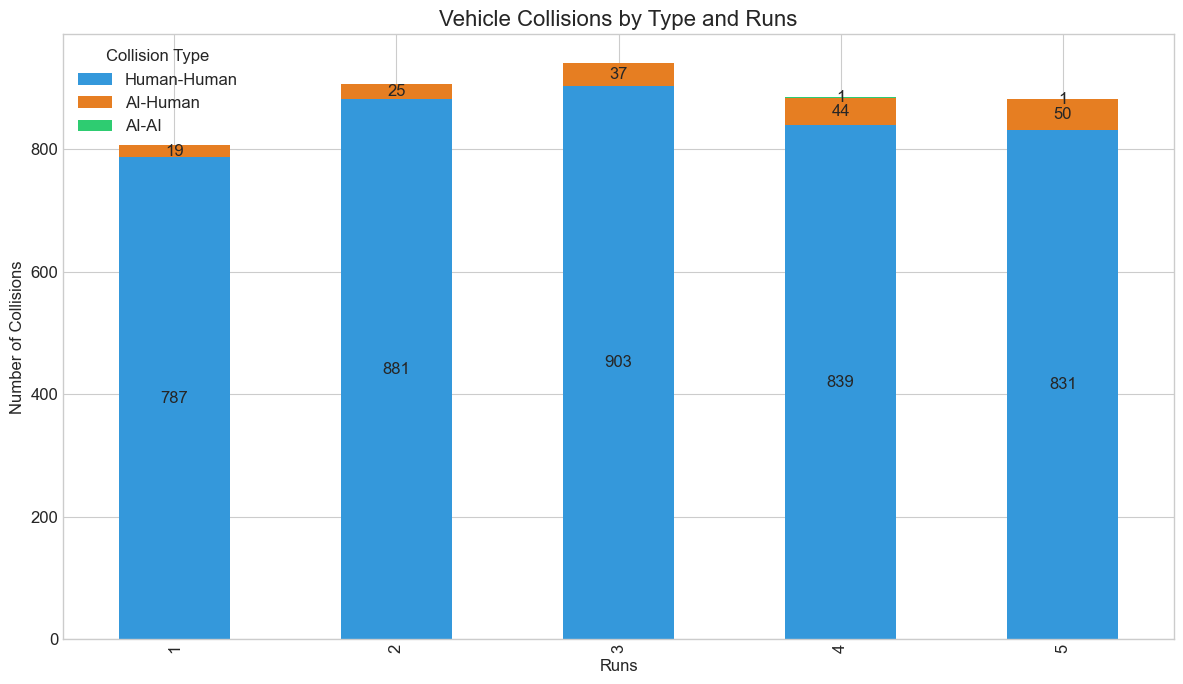

In [53]:
collision_types = collision_df[['Run', 'Human_Human_Collisions', 'AI_Human_Collisions', 'AI_AI_Collisions']]
collision_types_stacked = collision_types.set_index('Run')

ax = collision_types_stacked.plot(kind='bar', stacked=True, figsize=(12, 7), 
                                color=['#3498db', '#e67e22', '#2ecc71'])

plt.title('Vehicle Collisions by Type and Runs', fontsize=16)
plt.xlabel('Runs')
plt.ylabel('Number of Collisions')
plt.legend(['Human-Human', 'AI-Human', 'AI-AI'], title='Collision Type')

for c in ax.containers:
    labels = [f'{int(v):,}' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type='center')

plt.tight_layout()
plt.show()

## Pie Chart of Collision Types for the Latest Run

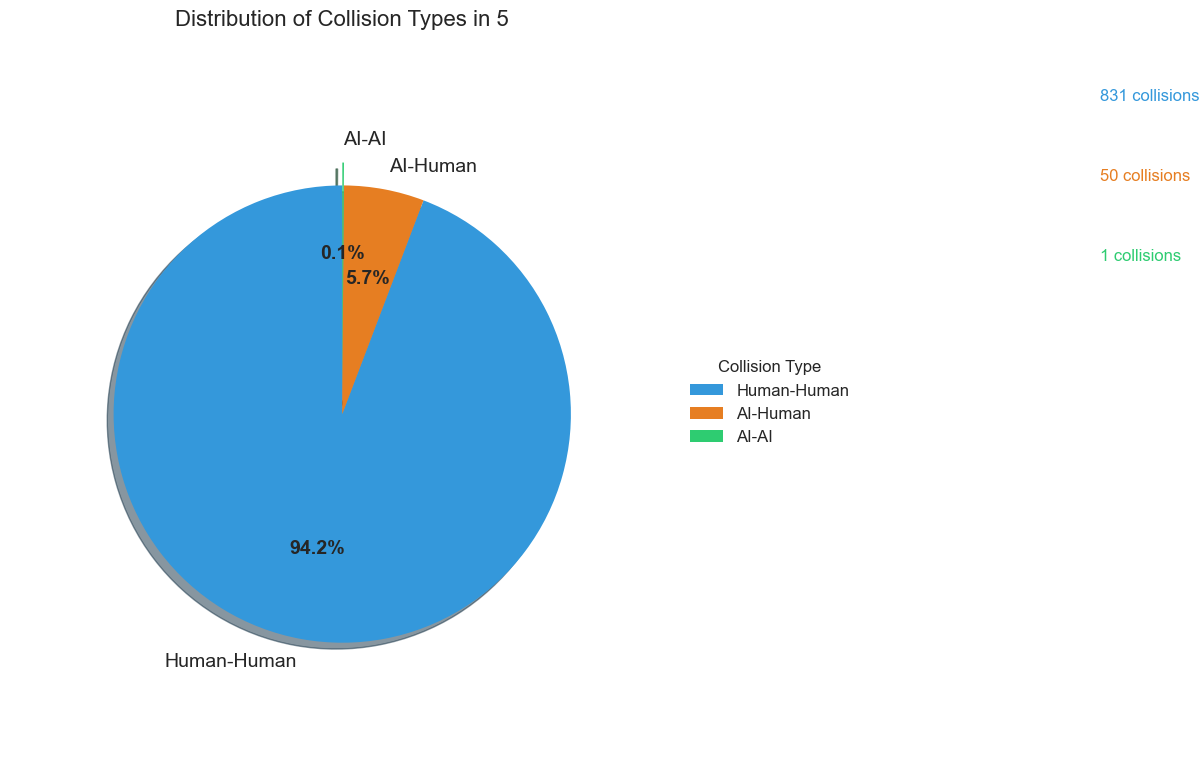

In [54]:
latest_run = collision_df['Run'].max()
latest_data = collision_df[collision_df['Run'] == latest_run]

collision_types = ['Human-Human', 'AI-Human', 'AI-AI']
collision_values = [
    latest_data['Human_Human_Collisions'].values[0],
    latest_data['AI_Human_Collisions'].values[0],
    latest_data['AI_AI_Collisions'].values[0]
]

colors = ['#3498db', '#e67e22', '#2ecc71']

min_index = collision_values.index(min(collision_values))
explode = [0, 0, 0]
explode[min_index] = 0.1

plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(collision_values, labels=collision_types, 
                                   autopct='%1.1f%%', startangle=90, 
                                   colors=colors, explode=explode,
                                   shadow=True, textprops={'fontsize': 14})

for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.title(f'Distribution of Collision Types in {latest_run}', fontsize=16)
plt.axis('equal') 

plt.legend(title="Collision Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

for i, value in enumerate(collision_values):
    plt.annotate(f"{int(value):,} collisions", 
                xy=(0, 0),
                xytext=(1.1, 0.85 - (i * 0.1)),
                textcoords="figure fraction",
                fontsize=12,
                color=colors[i])

plt.tight_layout()
plt.show()